# Calculating π Using Python
Created by Ganning Xu

## Imports
- [Math Module](https://docs.python.org/3/library/math.html): The math module was used to round the digits of PI to what was needed.
- [Random Module](https://docs.python.org/3/library/random.html): The random module was used to generate pseudo random numbers.

In [19]:
import math
import random

## Calculating PI from a given number of darts

<img src="https://i.imgur.com/eVr1i5r.png" width="500" height="500" />

The algorithm defined in this flowchart corresponds to the `get_pi(num_darts)` function. 

---

#### Documentation of `get_pi(num_darts)`
**Arguments**:
- `num_darts` - Integer. The number of darts that you want the simulation to run with. 

**Return**:
- Float, which is the predicted value of PI when simulating using `num_darts` number of darts

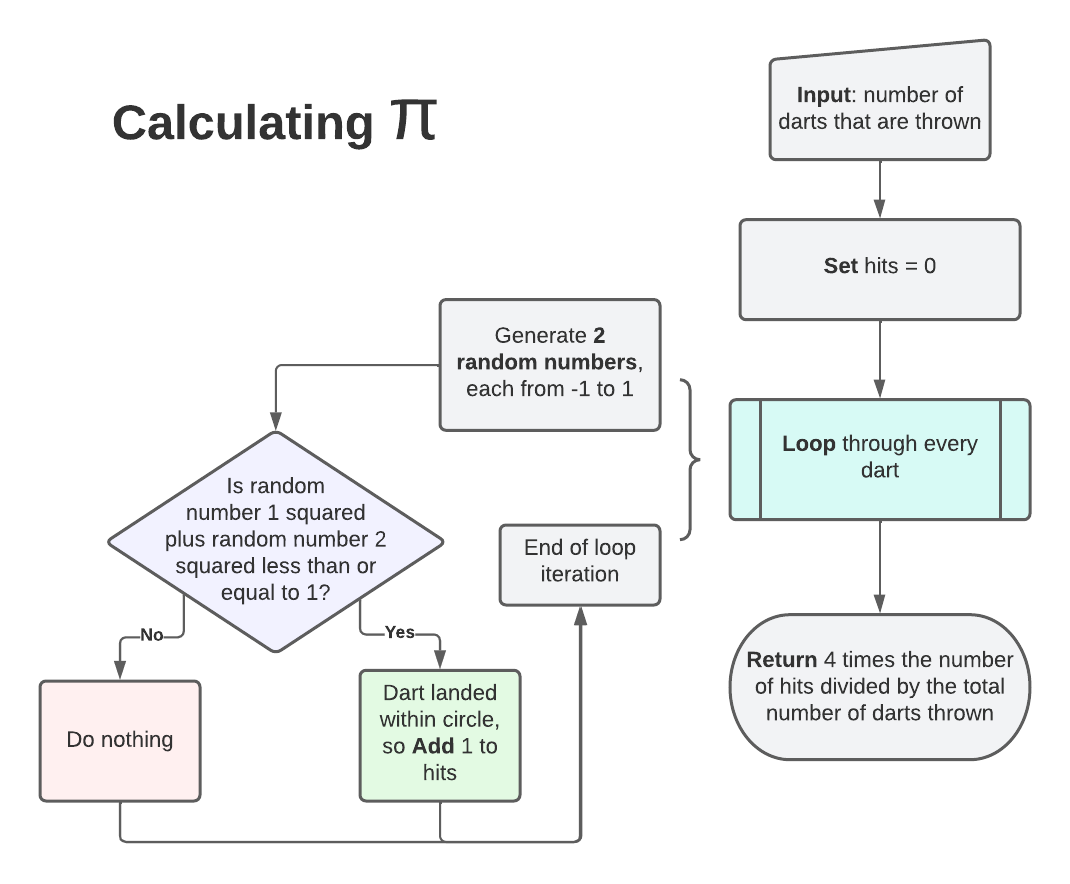

In [20]:
def get_pi(num_darts): 
    hits = 0 # the number of hits in the circle
    for _ in range(num_darts): # go through each time for each dart
        x = random.uniform(-1, 1) # random x value from -1 to 1
        y = random.uniform(-1, 1) # random y value from -1 to 1
        if (x ** 2) + (y**2) <= 1: # within circle because this is within the equation of a circle. our circle has a radius of 1
            hits += 1 # if the dart lands within the cirlce, we increment the number of hits by 1
        
    return 4 * hits / num_darts # return the predicted value of PI

## Simulation 
Function returns the number of darts needed to correctly predict PI to a given number of decimal places 95% of the time. 

<img src="https://i.imgur.com/6Msr3gc.png" width="500" height="500" />

---

#### Documentation of `simulate(digits_wanted, increment)`
**Arguments**: 
- `digits_wanted` - The number of decimal places desired for the predicted value of PI to be accurate to. 
- `increment` - The number of darts to increment by each time when the current number of darts is not enough.

**Return**: 
Function returns two values using multiple return. The return value is a tuple that can be accessed via indexing. 
- An example prediction of the value of PI is the first element in the tuple. (Float)
- The number of darts needed to get to predict the value of PI with 95% accuracy is the second element in the tuple. (Integer)

> Note: This function is NOT meant to be called by the user, but rather, is meant to to be called by the `display_info(decimals, increment)` function
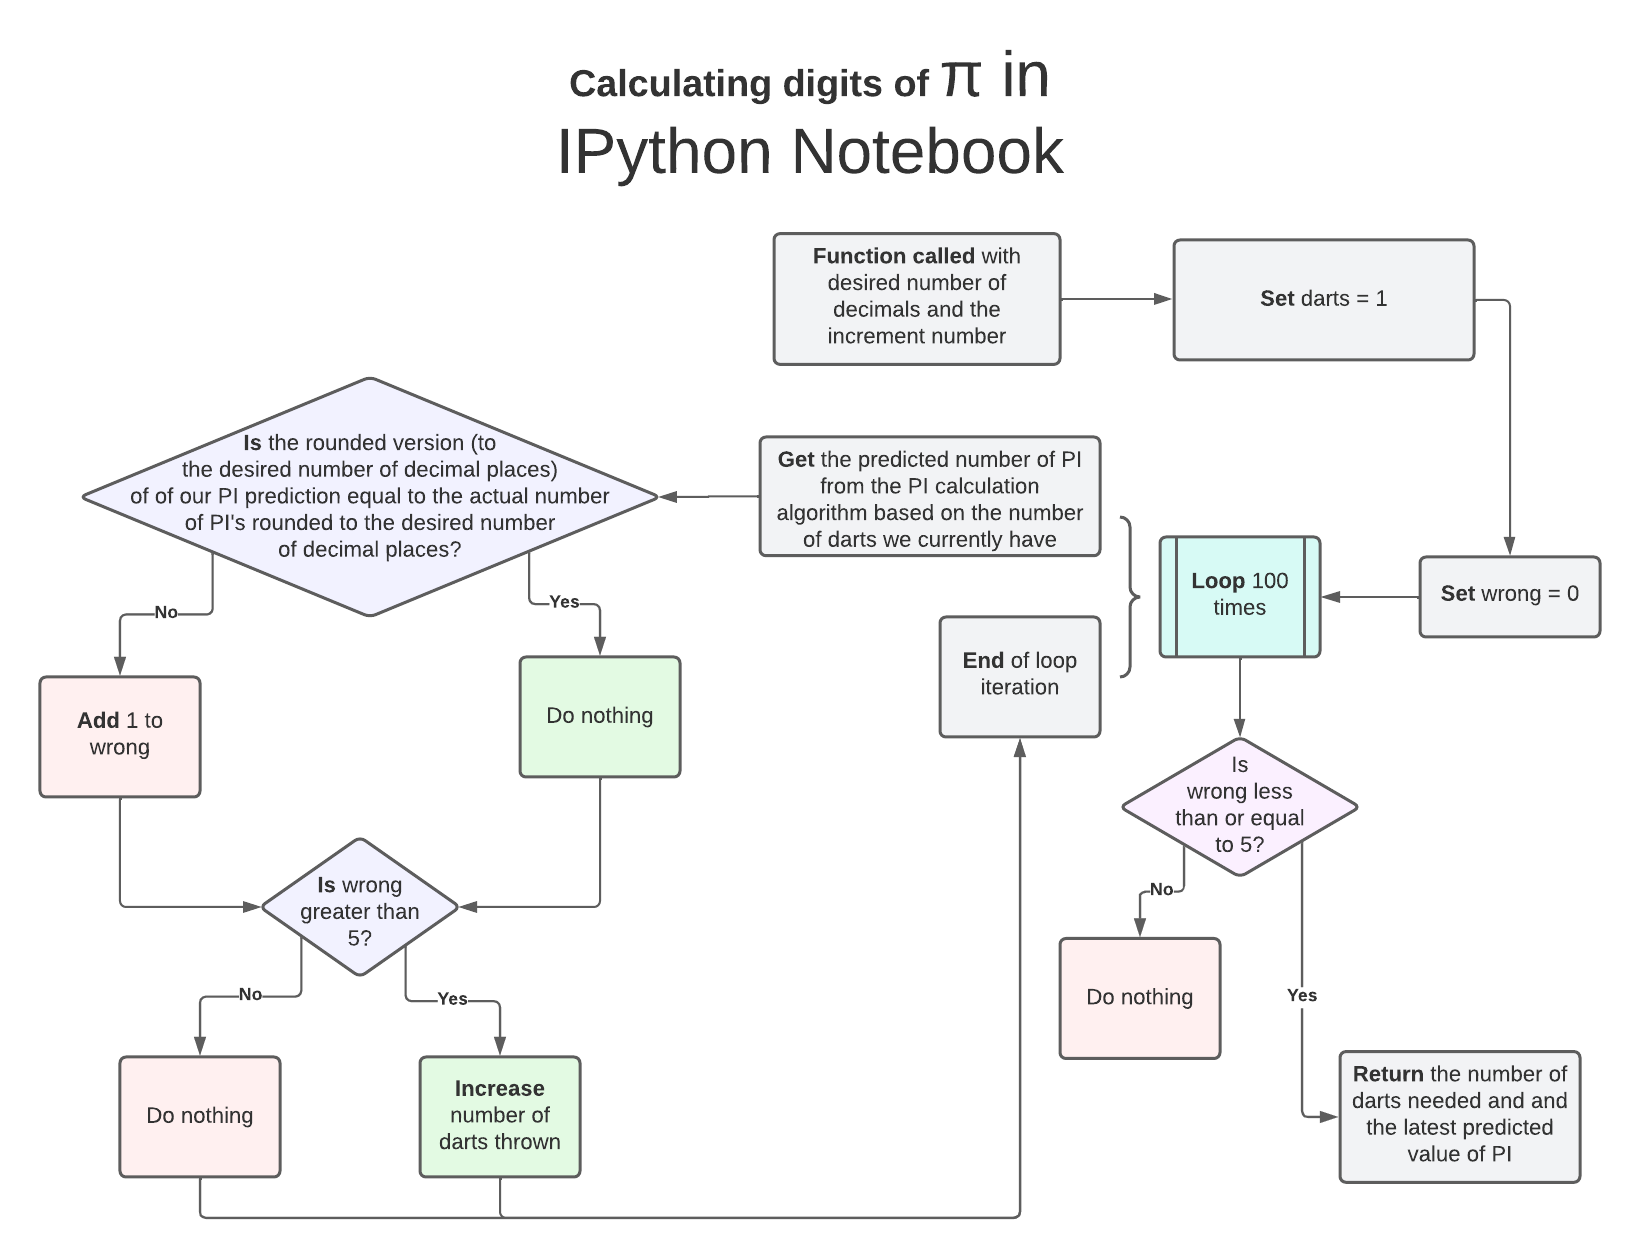

In [21]:
def simulate(digits_wanted, increment):
    darts = 1 # the initial number of darts that is needed
    while True: # loop forever until a result is reached 
        wrong = 0 # number of wrong guesses
        for _ in range(100): # loop 100 times 
            pred_pi = get_pi(darts) # predict the value of PI with the current number of darts
            if int(pred_pi * 10 ** digits_wanted) != int(math.pi * 10 ** digits_wanted): # check if the "floor" version of math.pi and the predicted value of pi are not equal when rounded to `digits_wanted` number of decimal places
                wrong += 1 # since they are not equal, add 1 to wrong
            if wrong > 5: # check if there are more than 5 wrong, so we don't waste computation time by looping through the rest. more than five wrong out of 100 trials is less than 95% accuracy
                darts += increment # increment number of darts
                break # break out of the current 100 loop iteration
        if wrong <= 5: # if there are less than or equal to five wrong, then we return the predicted number of darts and the predicted value of PI
            return pred_pi, darts, wrong

## Displaying Information

<img src="https://i.imgur.com/d5uAbH2.png" height="400" width='250' />

#### Documentation of `display_info(decimals, increment)`
**Arguments**:
- `digits_wanted` - The number of decimal places desired for the predicted value of PI to be accurate to. 
- `increment` - The number of darts to increment by each time when the current number of darts is not enough.
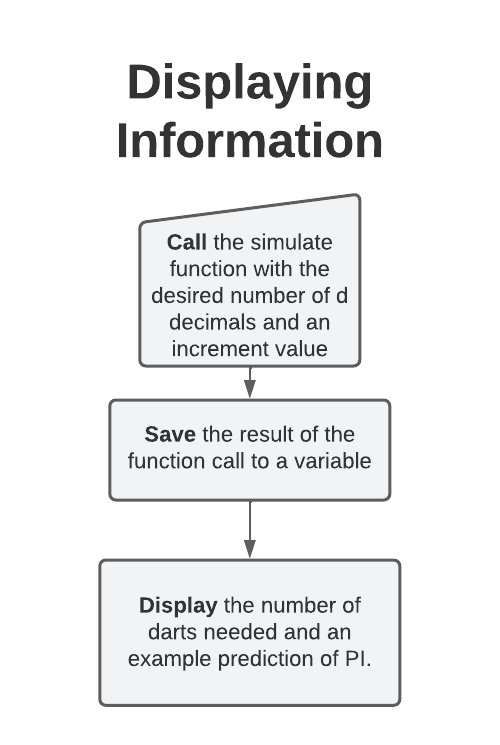

In [22]:
def display_info(decimals, increment):
    '''
    Call the simulate() function and display information to the screen.
        Decimals = the number of decimals that are desired
        Increment = the number of darts to increment by each time
        
    No return
    '''
    res = simulate(decimals, increment)
    print('The number of darts needed to be thrown for', str(100 - res[2]) + '%' ,'accuracy in', decimals+1, 'digits of PI is:', res[1], ' || An example calculation is:', res[0])

In [16]:
display_info(0, 1) # 0 decimals of PI (3), and increment by 1 dart each time

The number of darts needed to be thrown for 97% accuracy in 1 digits of PI is: 220  || An example calculation is: 3.1272727272727274


In [17]:
display_info(1,1) # 1 decimal of PI (3.1), and increment by 1 dart each time

The number of darts needed to be thrown for 95% accuracy in 2 digits of PI is: 2554  || An example calculation is: 3.138606108065779


In [23]:
display_info(2,10000) #2 decimals of PI (3.14), and increment by 10000 darts each time

The number of darts needed to be thrown for 95% accuracy in 3 digits of PI is: 1860001  || An example calculation is: 3.141449923951654


In [24]:
display_info(3,1000000) # 3 decimals of PI (3.141), and increment by 1000000 darts each time

The number of darts needed to be thrown for 96% accuracy in 4 digits of PI is: 32000001  || An example calculation is: 3.141166651838542


# Graphics / Data Visualizations

## Imports
- [Matplotlib](https://matplotlib.org/stable/index.html): Matplotlib.pyplot was used to create all three charts that are shown below.
- [Numpy](https://numpy.org/): Python package for scientific computing. Used to store the data that was used in the plots.
- [Math Module](https://docs.python.org/3/library/math.html): The math module was used to round the digits of PI to what was needed.
- [Random Module](https://docs.python.org/3/library/random.html): The random module was used to generate pseudo random numbers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

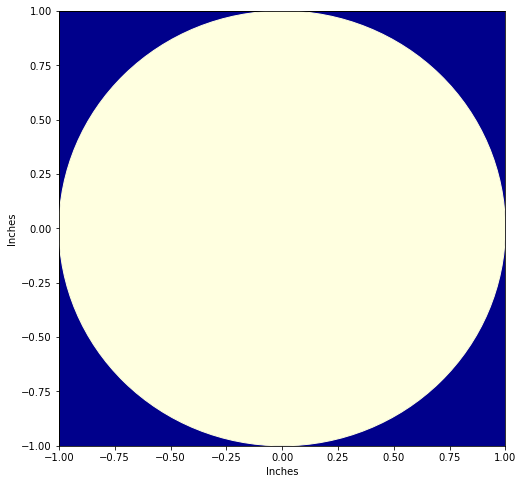

In [2]:
# Create a visualization on the shape and size of the dartbooard

theta = np.linspace(0, np.pi * 2, 201) # create equally spaced values from 0 to 2 PI with 201 values in between
rectangle = plt.e((-1,-1), 2, 2, fc='darkblue',ec="black") # create a rectangle with the bottom left corner at (-1, -1) with a width of 2 and a height of 2
circle1 = plt.Circle((0, 0), 1, color='lightyellow') # create a circle centered at (0,0) with a radius of 1
fig = plt.figure(figsize=(8, 8)) # figure size of 8 inches by 8 inches
plt.gca().add_patch(rectangle) # get the current axis and add the rectangle to the plot
plt.gca().add_patch(circle1) # get the current axis and add the circle to the plot
plt.xlim([-1, 1]) # set the min and max x values
plt.ylim([-1, 1]) # set the min and max y values
plt.xlabel('Inches') # set the x axis title
plt.ylabel('Inches') # set the y axis title
plt.savefig('sample.png') # save the figure with `sample.png` as the filename
plt.show() # show the figure

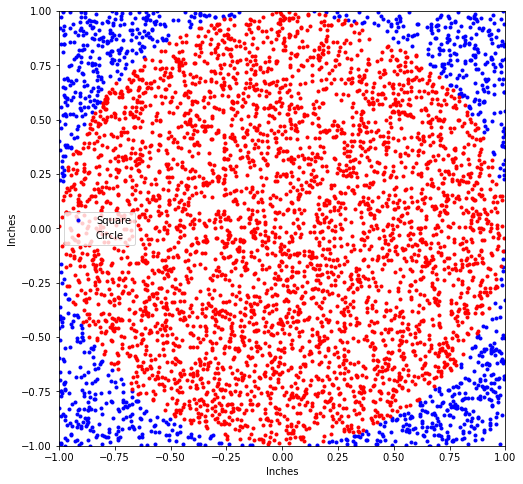

In [3]:
darts_throwing = 5000 # throwing 5000 darts

circle_x = [] # x coordinates of darts that landed only in the circle
circle_y = [] # y coordinates of darts that landed only in the circle
square_x = [] # x coordinates of darts that landed outside the circle
square_y = [] # y coordinates of darts that landed outside the circle

circle_radius = 1 # radius of the circle
for dart_i in range(darts_throwing): # loop through all the darts that we are throwing
    coords = (random.uniform(-1, 1), random.uniform(-1, 1)) # throw the dart by picking random values for x and y and store them in a tuple
    if (coords[0] ** 2) + (coords[1]**2) <= circle_radius ** 2: # check if the corrds landed within the circle
        circle_x.append(coords[0]) # add coordinates to their respective lists
        circle_y.append(coords[1])
    else:
        square_x.append(coords[0])
        square_y.append(coords[1])


fig = plt.figure(figsize=(8, 8)) # create a plot with a size of 8 inches by 8 inches
plt.xlim([-1, 1]) # set the min and max x values
plt.ylim([-1, 1]) # set the min and max y values
plt.plot(square_x, square_y, 'b.', label='Square') # plot the darts that landed outside of the circle
plt.plot(circle_x, circle_y, 'r.', label='Circle') # plot the darts that landed within the circle
plt.xlabel('Inches') # set the x axis title 
plt.ylabel('Inches') # set the y axis title

plt.legend() # show the legend
plt.savefig('sample1WithLegend.png') # save the figure 
plt.show() # show figure
    
        

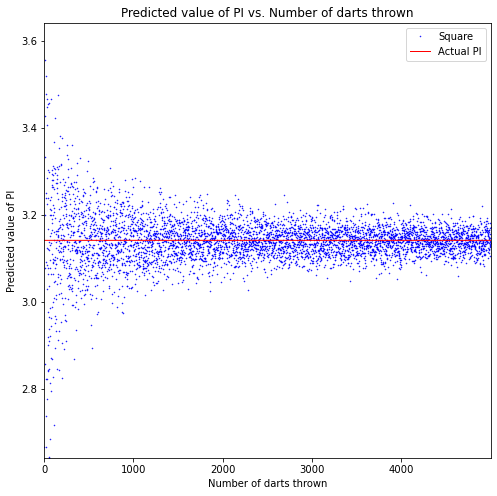

In [20]:
def get_pi(num_darts):
    # function to predict the value of PI based on the number of darts thrown
    hits = 0 # number of darts that landed within the circle
    for _ in range(num_darts): # go through all darts
        x = random.uniform(-1, 1) # generate random x value 
        y = random.uniform(-1, 1) # generate random y value
        if (x ** 2) + (y**2) <= circle_radius ** 1: # if the dart lands within the circle, add 1 to the number of hits
            hits += 1
        
    return 4 * hits / num_darts # return the calculated value of PI


# create a plot x are darst thrown y is the prediction of PI 
x = [] # range from 0 to the total number of darts thrown
y = [] # values of PI that are predicted
darts = 5000 # throwing 5000 darts
for darts in range(1, darts):
    pred_pi = get_pi(darts) # predict value of PI
    x.append(darts) # add the index number to the list of x values
    y.append(pred_pi) # add the predicted value of PI to the list of y values

fig = plt.figure(figsize=(8, 8)) # create a figure with dimensions of 8 inches by 8 inches
pis = [math.pi for _ in range(darts)] # generate a list of values of PI to draw the actual PI line
plt.plot(x, y, 'b.', label='Square', markersize=1) # plot scatter points of predicted values of PI
plt.plot(x, pis, 'r', label='Actual PI', linewidth=1) # plot the line of the actual values of PI
plt.xlim([0, darts]) # set the min and max x values
plt.ylim([math.pi - 0.5, math.pi + 0.5]) # set the min and max y values 
plt.xlabel('Number of darts thrown') # set the x axis title
plt.ylabel('Predicted value of PI') # set the y axis title
plt.legend() # show the legend
plt.title('Predicted value of PI vs. Number of darts thrown') # set the title of the graph
plt.savefig('line_with_preds.png') # save the figure
plt.show() # show the figure


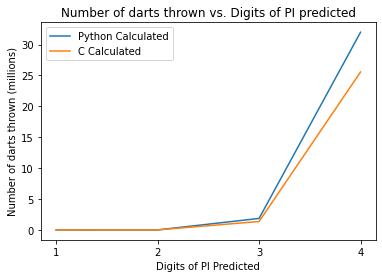

In [30]:
# plotting hte digits of pi calcuated and the number of darts thrown that neeeded it

digits_of_pi = [i for i in range(1, 5)] # create a list of values from 1 to 4
darts_thrown_py = np.array([220, 2554, 1860001, 32000001]) / 1000000 # number of darts thrown for python

darts_thrown_c = np.array([206, 2916, 1361916, 25561916]) / 1000000 # number of darts thrown for c


fig, ax = plt.subplots() # create a figure and a set of subplots
ax.plot(digits_of_pi, darts_thrown_py, label='Python Calculated') # plot the python values
ax.set_xticks(np.arange(1, 5,1)) # set the increments for the x values (by 1)
ax.plot(digits_of_pi, darts_thrown_c, label='C Calculated') # plot the c values
plt.xlabel('Digits of PI Predicted') # set the x axis title
plt.ylabel('Number of darts thrown (millions)')  # set the y axis title
plt.title('Number of darts thrown vs. Digits of PI predicted') # set the chart title
plt.legend() # show the legend
plt.savefig('Digits_Darts.png') # save the figure
plt.show() # show the figure